# Taco Delivery Prediction

## 1. Introduction
### 1.1 Project Objective
    This project aims to predict the delivery duration (in minutes) of taco orders using machine learning techniques. We'll compare the performance of various regression models and determine which one provides the most accurate predictions
### 1.2 Dataset
    The dataset was taken fully from Kaggle. Source: https://www.kaggle.com/datasets/atharvasoundankar/taco-sales-dataset-20242025

    

## 2. Imports and Setup

In [660]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

## 3. Load and Explore Data

In [661]:
df = pd.read_csv('data/taco_sales_data.csv')

In [662]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Order ID                 1000 non-null   int64  
 1   Restaurant Name          1000 non-null   object 
 2   Location                 1000 non-null   object 
 3   Order Time               1000 non-null   object 
 4   Delivery Time            1000 non-null   object 
 5   Delivery Duration (min)  1000 non-null   int64  
 6   Taco Size                1000 non-null   object 
 7   Taco Type                1000 non-null   object 
 8   Toppings Count           1000 non-null   int64  
 9   Distance (km)            1000 non-null   float64
 10  Price ($)                1000 non-null   float64
 11  Tip ($)                  1000 non-null   float64
 12  Weekend Order            1000 non-null   bool   
dtypes: bool(1), float64(3), int64(3), object(6)
memory usage: 94.9+ KB


In [663]:
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order
0,770487,El Taco Loco,New York,01-08-2024 14:55,01-08-2024 15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False
1,671858,El Taco Loco,San Antonio,23-11-2024 17:11,23-11-2024 17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True
2,688508,Taco Haven,Austin,21-11-2024 20:24,21-11-2024 21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False
3,944962,Spicy Taco House,Dallas,21-09-2024 06:43,21-09-2024 07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True
4,476417,Casa del Taco,San Antonio,24-07-2024 11:01,24-07-2024 11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False


In [664]:
dt_parsed = pd.to_datetime(df['Delivery Time'], format='%d-%m-%Y %H:%M')

df['Delivery Date'] = dt_parsed.dt.date
df['Delivery Time'] = dt_parsed.dt.strftime('%H:%M')
df['Delivery Weekday'] = dt_parsed.dt.day_name()

df['Order Date'] = dt_parsed.dt.date
df['Order Time'] = dt_parsed.dt.strftime('%H:%M')


In [665]:
df.head()
# fix Delivery Time

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order,Delivery Date,Delivery Weekday,Order Date
0,770487,El Taco Loco,New York,15:36,15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False,2024-08-01,Thursday,2024-08-01
1,671858,El Taco Loco,San Antonio,17:25,17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True,2024-11-23,Saturday,2024-11-23
2,688508,Taco Haven,Austin,21:02,21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False,2024-11-21,Thursday,2024-11-21
3,944962,Spicy Taco House,Dallas,07:28,07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True,2024-09-21,Saturday,2024-09-21
4,476417,Casa del Taco,San Antonio,11:16,11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False,2024-07-24,Wednesday,2024-07-24


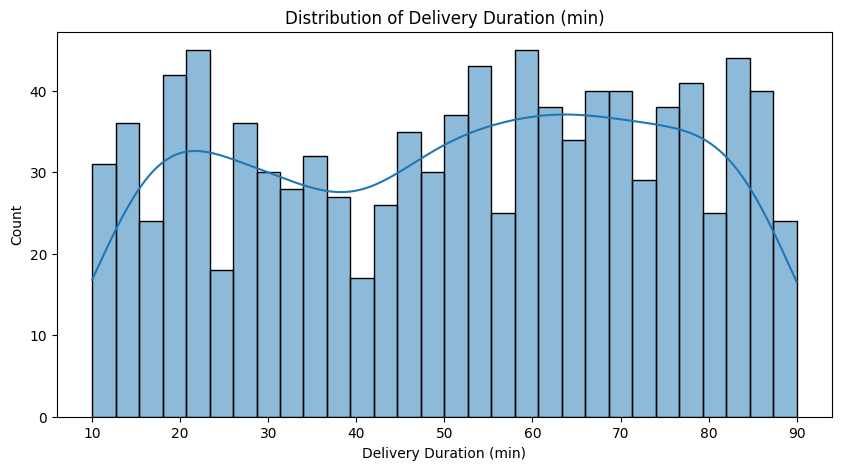

In [666]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Delivery Duration (min)'], bins=30, kde=True)
plt.title("Distribution of Delivery Duration (min)")
plt.xlabel("Delivery Duration (min)")
plt.ylabel("Count")
plt.show()


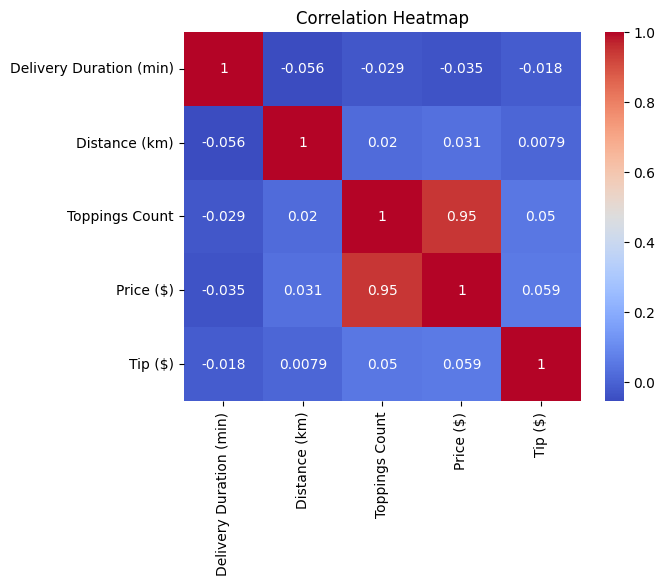

In [667]:
numerical_cols = ['Delivery Duration (min)', 'Distance (km)', 'Toppings Count', 'Price ($)', 'Tip ($)']
corr = df[numerical_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

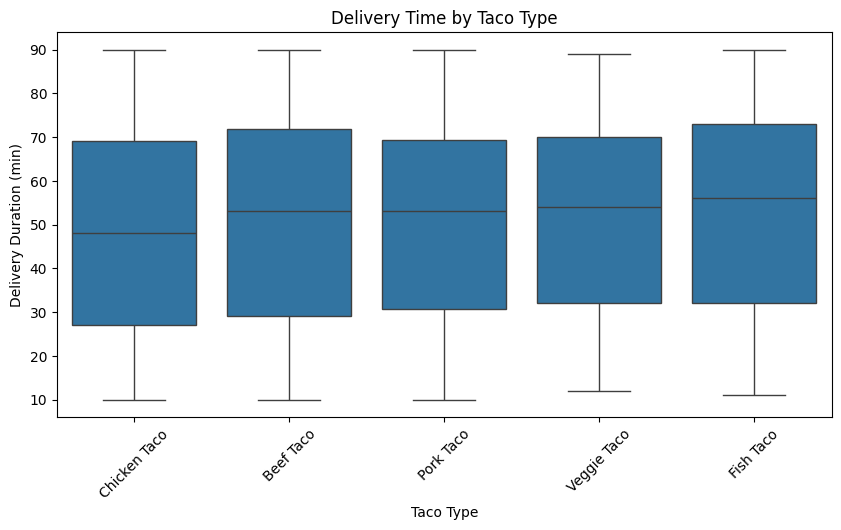

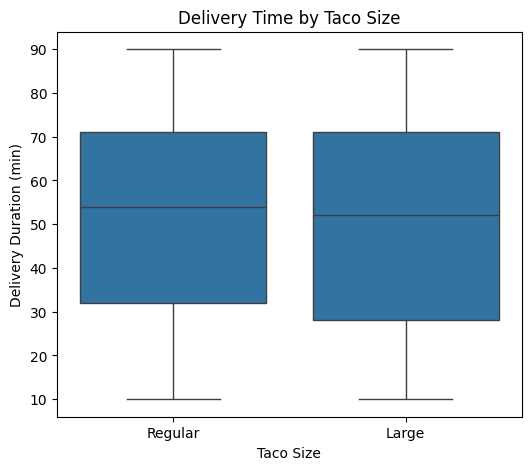

In [668]:
# Taco Type
plt.figure(figsize=(10, 5))
sns.boxplot(x='Taco Type', y='Delivery Duration (min)', data=df)
plt.xticks(rotation=45)
plt.title("Delivery Time by Taco Type")
plt.show()

# Taco Size
plt.figure(figsize=(6, 5))
sns.boxplot(x='Taco Size', y='Delivery Duration (min)', data=df)
plt.title("Delivery Time by Taco Size")
plt.show()


In [669]:
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order,Delivery Date,Delivery Weekday,Order Date
0,770487,El Taco Loco,New York,15:36,15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False,2024-08-01,Thursday,2024-08-01
1,671858,El Taco Loco,San Antonio,17:25,17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True,2024-11-23,Saturday,2024-11-23
2,688508,Taco Haven,Austin,21:02,21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False,2024-11-21,Thursday,2024-11-21
3,944962,Spicy Taco House,Dallas,07:28,07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True,2024-09-21,Saturday,2024-09-21
4,476417,Casa del Taco,San Antonio,11:16,11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False,2024-07-24,Wednesday,2024-07-24


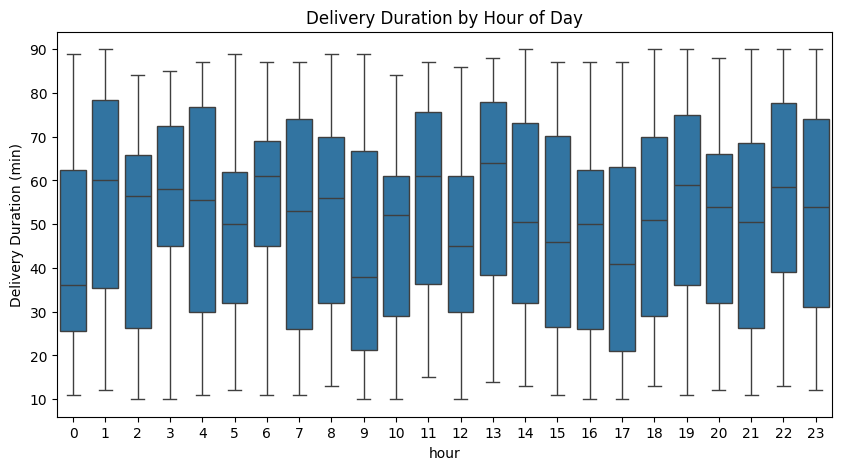

In [670]:
df['Order Time'] = pd.to_datetime(df['Order Time'], format='%H:%M')
df['hour'] = df['Order Time'].dt.hour

plt.figure(figsize=(10, 5))
sns.boxplot(x='hour', y='Delivery Duration (min)', data=df)
plt.title("Delivery Duration by Hour of Day")
plt.show()


## Data Preprocessing & Feature Engineering

In [671]:
df.head()

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order,Delivery Date,Delivery Weekday,Order Date,hour
0,770487,El Taco Loco,New York,1900-01-01 15:36:00,15:36,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False,2024-08-01,Thursday,2024-08-01,15
1,671858,El Taco Loco,San Antonio,1900-01-01 17:25:00,17:25,14,Regular,Beef Taco,1,6.20,4.25,3.01,True,2024-11-23,Saturday,2024-11-23,17
2,688508,Taco Haven,Austin,1900-01-01 21:02:00,21:02,38,Large,Pork Taco,2,20.33,7.00,0.02,False,2024-11-21,Thursday,2024-11-21,21
3,944962,Spicy Taco House,Dallas,1900-01-01 07:28:00,07:28,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True,2024-09-21,Saturday,2024-09-21,7
4,476417,Casa del Taco,San Antonio,1900-01-01 11:16:00,11:16,15,Large,Pork Taco,0,24.34,4.50,1.14,False,2024-07-24,Wednesday,2024-07-24,11


In [672]:
weekday_map = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}
df['dayofweek'] = df['Delivery Weekday'].map(weekday_map)
df['is_weekend'] = df['Weekend Order'].astype(int)




In [673]:
df = df.drop(columns=['Order ID', 'Delivery Time', 'Order Time', 'Order Date', 'Delivery Date', 'Delivery Weekday'])  # optional, keep if useful


In [674]:
df_encoded = pd.get_dummies(df, columns=['Restaurant Name', 'Location', 'Taco Type', 'Taco Size'], drop_first=True)


In [675]:
X = df_encoded.drop(columns=['Delivery Duration (min)'])
y = df_encoded['Delivery Duration (min)']


In [676]:
df.head()

,Restaurant Name,Location,Delivery Duration (min),Taco Size,Taco Type,Toppings Count,Distance (km),Price ($),Tip ($),Weekend Order,hour,dayofweek,is_weekend
0,El Taco Loco,New York,41,Regular,Chicken Taco,5,3.01,9.25,2.22,False,15,3,0
1,El Taco Loco,San Antonio,14,Regular,Beef Taco,1,6.20,4.25,3.01,True,17,5,1
2,Taco Haven,Austin,38,Large,Pork Taco,2,20.33,7.00,0.02,False,21,3,0
3,Spicy Taco House,Dallas,45,Regular,Chicken Taco,2,3.00,5.50,1.90,True,7,5,1
4,Casa del Taco,San Antonio,15,Large,Pork Taco,0,24.34,4.50,1.14,False,11,2,0


In [677]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [678]:
X_train.dtypes


Toppings Count                         int64
Distance (km)                        float64
Price ($)                            float64
Tip ($)                              float64
Weekend Order                           bool
hour                                   int32
dayofweek                              int64
is_weekend                             int32
Restaurant Name_El Taco Loco            bool
Restaurant Name_Grande Tacos            bool
Restaurant Name_La Vida Taco            bool
Restaurant Name_Spicy Taco House        bool
Restaurant Name_Taco Fiesta             bool
Restaurant Name_Taco Haven              bool
Restaurant Name_Taco Time Express       bool
Restaurant Name_The Taco Stand          bool
Restaurant Name_Urban Tacos             bool
Location_Chicago                        bool
Location_Dallas                         bool
Location_Houston                        bool
Location_Los Angeles                    bool
Location_New York                       bool
Location_P

In [679]:
lr = LinearRegression()
rf = RandomForestRegressor(random_state=10) 
gb = GradientBoostingRegressor(random_state=10)  
xgb = XGBRegressor(random_state=10, verbosity=0)  


lr.fit(X_train, y_train)   
rf.fit(X_train, y_train)  
gb.fit(X_train, y_train)   
xgb.fit(X_train, y_train)  

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_xgb = xgb.predict(X_test)


results = []
for name, y_pred in [
    ("Linear Regression", y_pred_lr),
    ("Random Forest", y_pred_rf),
    ("Gradient Boosting", y_pred_gb),
    ("XGBoost", y_pred_xgb)
]:
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    })

results_df = pd.DataFrame(results)

print("Model performance on test set:")
print(results_df)

Model performance on test set:
               Model        MAE         MSE       RMSE
0  Linear Regression  22.061980  646.733016  25.430946
1      Random Forest  21.903350  639.417397  25.286704
2  Gradient Boosting  22.086309  648.076663  25.457350
3            XGBoost  22.297501  726.357930  26.951028


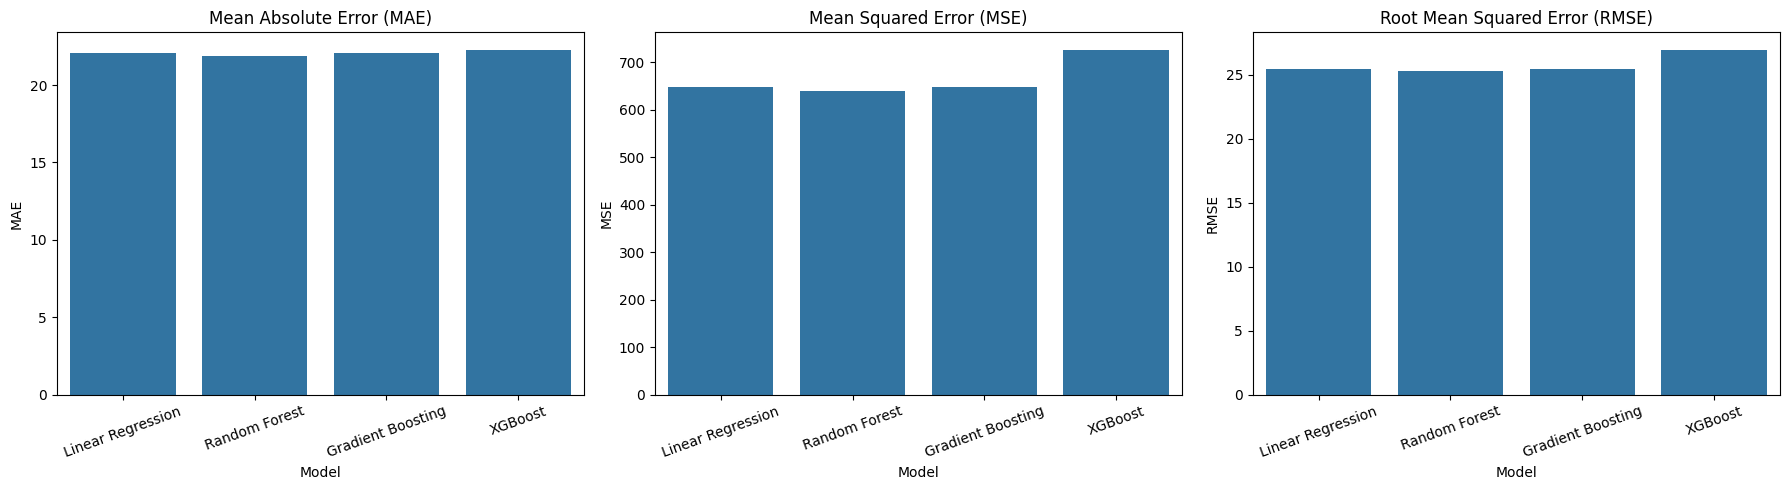

In [680]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics = ['MAE', 'MSE', 'RMSE']
titles = ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)']

for i, metric in enumerate(metrics):
    sns.barplot(x='Model', y=metric, data=results_df, ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

In [ ]:
lr_importance = pd.Series(lr.coef_, index=X_train.columns).abs().sort_values(ascending=False)


rf_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

gb_importance = pd.Series(gb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

xgb_importance = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print("Top 10 features for Linear Regression:")
print(lr_importance.head(10), '\n')

print("Top 10 features for Random Forest:")
print(rf_importance.head(10), '\n')

print("Top 10 features for Gradient Boosting:")
print(gb_importance.head(10), '\n')

print("Top 10 features for XGBoost:")
print(xgb_importance.head(10))

Top 10 features for Linear Regression:
Weekend Order                        1.696921e+13
is_weekend                           1.696921e+13
Taco Size_Regular                    1.462425e+08
Toppings Count                       1.218688e+08
Price ($)                            9.749501e+07
Restaurant Name_Taco Time Express    5.833420e+00
Location_Dallas                      5.121590e+00
Restaurant Name_Spicy Taco House     5.043341e+00
Restaurant Name_Grande Tacos         3.988489e+00
Restaurant Name_Taco Haven           3.677154e+00
dtype: float64 

Top 10 features for Random Forest:
Distance (km)                   0.203947
Tip ($)                         0.181772
hour                            0.119010
Price ($)                       0.062834
dayofweek                       0.056801
Toppings Count                  0.044780
Taco Type_Chicken Taco          0.020735
Taco Type_Fish Taco             0.016231
Restaurant Name_La Vida Taco    0.015514
Location_Los Angeles            0.015502